Punto 1

/tmp/ipython-input-2501916155.py:80: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))


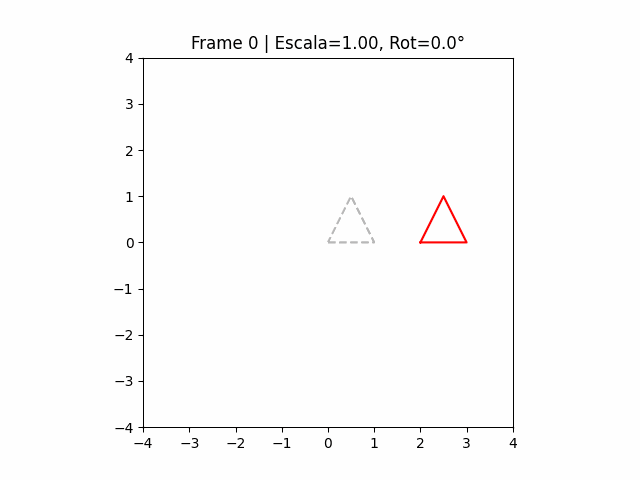

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# ======================
# 1. Figura inicial (triángulo)
# ======================
# Cada columna es un punto (x, y, 1) en coordenadas homogéneas
triangle = np.array([
    [0, 1, 0.5],   # x
    [0, 0, 1],     # y
    [1, 1, 1]      # homogéneo
])

# ======================
# 2. Funciones de transformación
# ======================
def translation_matrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def scale_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

# ======================
# 3. Animación
# ======================
frames = []
n_frames = 60

for t in range(n_frames):
    # Parámetros dinámicos
    angle = 2 * np.pi * t / n_frames       # rotación 0 → 360°
    tx = 2 * np.cos(angle)                 # traslación en x
    ty = 2 * np.sin(angle)                 # traslación en y
    s = 1 + 0.5 * np.sin(angle)            # escala variable

    # Matriz de transformación resultante
    T = translation_matrix(tx, ty) @ rotation_matrix(angle) @ scale_matrix(s, s)
    transformed = T @ triangle

    # ======================
    # 4. Graficar
    # ======================
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    # Triángulo original (gris)
    ax.plot(np.append(triangle[0], triangle[0,0]),
            np.append(triangle[1], triangle[1,0]),
            "k--", alpha=0.3)

    # Triángulo transformado (rojo)
    ax.plot(np.append(transformed[0], transformed[0,0]),
            np.append(transformed[1], transformed[1,0]),
            "r-")

    ax.set_title(f"Frame {t} | Escala={s:.2f}, Rot={np.degrees(angle):.1f}°")

    # Guardar frame
    fname = f"frame_{t}.png"
    plt.savefig(fname)
    plt.close()
    frames.append(imageio.imread(fname))

# ======================
# Mostrar GIF directamente en la notebook
Image(filename="animacion.gif")
